In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
num_inputs = 4
dimension = 2

In [20]:
input_array = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

In [21]:
output_array = np.array([0, 1, 1, 0])

In [22]:
# Bias Input
bias = np.ones((num_inputs, 1))
input_array.shape

(4, 2)

In [23]:
var_mul = (input_array[:,0] * input_array[:,1]).reshape(num_inputs, 1)
input_bias = np.hstack((bias, var_mul, input_array))
#input_bias = np.hstack((bias, input_array))

In [24]:
# randomly initialize the weights
weight = np.random.randn(dimension + 2)
#weight = np.random.randn(dimension + 1)

In [25]:
# calculate the model output
model_output = input_bias.dot(weight)

In [26]:
def sigmoid(model_output):
    return 1/(1 + np.exp(-model_output))

In [27]:
Y_pred = sigmoid(model_output)

In [28]:
# cross-entropy error
def cross_entropy(actual, prediction):
    E = 0
    for i in range(num_inputs):
        if actual[i] == 1:
            E -= np.log(prediction[i])
        else:
            E -= np.log(1 - prediction[i])
    return E

In [29]:
# Gradient Descent
learning_rate = 0.01
error_array = []

In [30]:
for i in range(10000):
    error = cross_entropy(output_array, Y_pred)
    error_array.append(error)
    if i % 100 == 0:
        print(error)

    # gradient descent weight udpate
    weight += learning_rate * ( input_bias.T.dot(output_array - Y_pred) )

    Y_pred = sigmoid(input_bias.dot(weight))

2.94853842629
2.74853750172
2.59463837361
2.45729430995
2.33226559053
2.21741075003
2.11127635884
2.0128106186
1.92121172223
1.83583675144
1.75614712717
1.68167616887
1.61200978018
1.546774802
1.48563178331
1.42827026914
1.37440551242
1.32377599172
1.27614139197
1.2312808627
1.18899145562
1.1490866915
1.11139523167
1.0757596419
1.04203524263
1.0100890419
0.979798747731
0.951051857028
0.923744817309
0.897782257552
0.873076283913
0.84954583604
0.827116099628
0.805717970904
0.785287568878
0.765765791362
0.747097910997
0.729233207751
0.712124634616
0.695728513482
0.680004258393
0.664914123657
0.650422974482
0.63649807802
0.623108912918
0.610226995616
0.597825721842
0.585880221863
0.574367228213
0.563264954739
0.552552985908
0.542212175436
0.532224553379
0.522573240911
0.513242372101
0.504217022044
0.495483140797
0.48702749258
0.4788375998
0.47090169146
0.463208655579
0.455747995277
0.448509788207
0.441484649054
0.434663694847
0.428038512831
0.421601130716
0.415343989078
0.409259915757
0.40

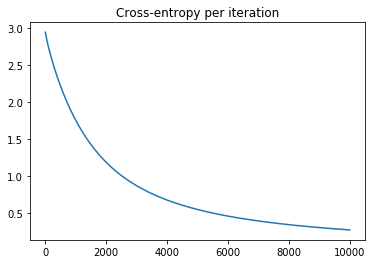

In [31]:
plt.plot(error_array)
plt.title("Cross-entropy per iteration")
plt.show()

In [32]:
print("Final weight:", weight)
print("Final classification rate:", 
          1 - np.abs(output_array - np.round(Y_pred)).sum() / num_inputs)

Final weight: [ -2.23713259 -10.72447914   4.9214998    4.92150287]
Final classification rate: 1.0
